# Импортируем базовые библиотеки, подгружаем датасет

In [73]:
import pandas as pd
import numpy as np
import seaborn as sb
import sklearn.preprocessing as prep
df = pd.read_csv("./data.csv")
#print(df)

## Фильтруем нужные поля, смотрим типы

In [74]:
fields = [
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'MultipleLines',
    'PhoneService',
    'InternetService',
    'OnlineSecurity',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod',
    'MonthlyCharges',
    'TotalCharges',
    'Churn' 
    ]
df = df.loc[:, fields]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   MultipleLines     7043 non-null   object 
 5   PhoneService      7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  PaperlessBilling  7043 non-null   object 
 14  PaymentMethod     7043 non-null   object 
 15  MonthlyCharges    7043 non-null   float64
 16  TotalCharges      7043 non-null   object 


# Смотрим возможные значения категориальных полей

In [75]:
print("SeniorCitizen values: ", df["SeniorCitizen"].unique())
print("Partner values: ", df["Partner"].unique())

print("gender values: ", df["gender"].unique())
print("Dependents values: ", df["Dependents"].unique())

print("MultipleLines values: ", df["MultipleLines"].unique())
print("PhoneService values: ", df["PhoneService"].unique())

print("InternetService values: ", df["InternetService"].unique())

print("OnlineSecurity values: ", df["OnlineSecurity"].unique())
print("DeviceProtection values: ", df["DeviceProtection"].unique())

print("TechSupport values: ", df["TechSupport"].unique())
print("StreamingTV values: ", df["StreamingTV"].unique())

print("StreamingMovies values: ", df["StreamingMovies"].unique())
print("Contract values: ", df["Contract"].unique())

print("PaperlessBilling values: ", df["PaperlessBilling"].unique())
print("PaymentMethod values: ", df["PaymentMethod"].unique())

print("Churn values: ", df["Churn"].unique())

SeniorCitizen values:  [0 1]
Partner values:  ['Yes' 'No']
gender values:  ['Female' 'Male']
Dependents values:  ['No' 'Yes']
MultipleLines values:  ['No phone service' 'No' 'Yes']
PhoneService values:  ['No' 'Yes']
InternetService values:  ['DSL' 'Fiber optic' 'No']
OnlineSecurity values:  ['No' 'Yes' 'No internet service']
DeviceProtection values:  ['No' 'Yes' 'No internet service']
TechSupport values:  ['No' 'Yes' 'No internet service']
StreamingTV values:  ['No' 'Yes' 'No internet service']
StreamingMovies values:  ['No' 'Yes' 'No internet service']
Contract values:  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling values:  ['Yes' 'No']
PaymentMethod values:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn values:  ['No' 'Yes']


# Кодируем категориальные переменные

In [76]:
from sklearn.preprocessing import LabelEncoder

yes_no_fields = [
    'gender',
    'Partner',
    'Dependents',
    'PaperlessBilling',
    'PhoneService',
    'Churn'
]

for index in df.index:
    v = df.at[index, 'TotalCharges']
    try:
        v = float(v)
    except:
        v = -1

    df.at[index, 'TotalCharges'] = v    
    
        
    for f in yes_no_fields:            
        if (df.loc[index, f] == "No"):
            df.at[index, f] = 0
        else:
            df.at[index, f] = 1    
    
df[yes_no_fields] = df[yes_no_fields].apply(pd.to_numeric)            
df[['TotalCharges']] = df[['TotalCharges']].apply(pd.to_numeric)             
        
multiple_lines_enc = LabelEncoder()
df['MultipleLines'] = multiple_lines_enc.fit_transform(df['MultipleLines'])
            
internet_service_enc = LabelEncoder()
df['InternetService'] = internet_service_enc.fit_transform(df['InternetService'])

device_protection_enc = LabelEncoder()
df['DeviceProtection'] = device_protection_enc.fit_transform(df['DeviceProtection'])

online_security_enc = LabelEncoder()
df['OnlineSecurity'] = online_security_enc.fit_transform(df['OnlineSecurity'])

tech_support_enc = LabelEncoder()
df['TechSupport'] = tech_support_enc.fit_transform(df['TechSupport'])

streaming_tv_enc = LabelEncoder()
df['StreamingTV'] = streaming_tv_enc.fit_transform(df['StreamingTV'])

streaming_movies_enc = LabelEncoder()
df['StreamingMovies'] = streaming_movies_enc.fit_transform(df['StreamingMovies'])

contract_enc = LabelEncoder()
df['Contract'] = contract_enc.fit_transform(df['Contract'])

payment_method_enc = LabelEncoder()
df['PaymentMethod'] = payment_method_enc.fit_transform(df['PaymentMethod'])

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   MultipleLines     7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   InternetService   7043 non-null   int64  
 7   OnlineSecurity    7043 non-null   int64  
 8   DeviceProtection  7043 non-null   int64  
 9   TechSupport       7043 non-null   int64  
 10  StreamingTV       7043 non-null   int64  
 11  StreamingMovies   7043 non-null   int64  
 12  Contract          7043 non-null   int64  
 13  PaperlessBilling  7043 non-null   int64  
 14  PaymentMethod     7043 non-null   int64  
 15  MonthlyCharges    7043 non-null   float64
 16  TotalCharges      7043 non-null   float64


# EDA

In [77]:
valuesToPlot = [[], []]
eda_df = df.loc[df['TotalCharges'] != -1].loc[:, ['MonthlyCharges', 'TotalCharges']]
#print(eda_df)

indicators = ['MonthlyCharges', 'TotalCharges']
i = 0
for indicator in indicators:
    #print(indicator)
    values = eda_df.loc[:, indicator].astype('float32')
    print(values)
    valuesToPlot[i] = values
    i = i + 1
    mean = values.mean()
    std = values.std()
    median = values.median()
    perecntile_25 = np.percentile(values, 25)
    perecntile_75 = np.percentile(values, 75)

    #print("Мат. ожидание: ", mean)
    #print("Дисперсия: ", std)
    #print("Медиана: ", median)
    #print("25-ый персцентиль: ", perecntile_25)
    #print("75-ый персцентиль: ", perecntile_75)
    print("\n\n")


0        29.850000
1        56.950001
2        53.849998
3        42.299999
4        70.699997
           ...    
7038     84.800003
7039    103.199997
7040     29.600000
7041     74.400002
7042    105.650002
Name: MonthlyCharges, Length: 7032, dtype: float32



0         29.850000
1       1889.500000
2        108.150002
3       1840.750000
4        151.649994
           ...     
7038    1990.500000
7039    7362.899902
7040     346.450012
7041     306.600006
7042    6844.500000
Name: TotalCharges, Length: 7032, dtype: float32





<Axes: xlabel='MonthlyCharges', ylabel='Count'>

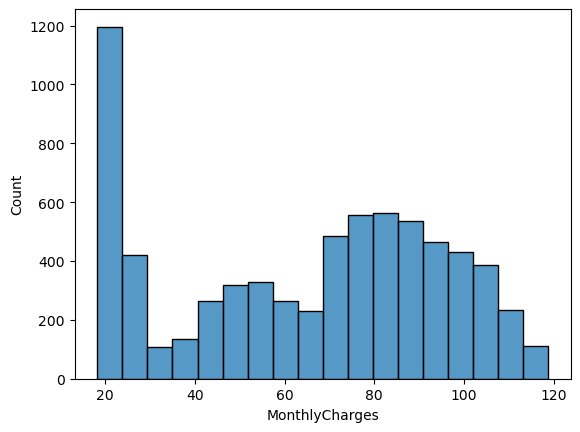

In [78]:
sb.histplot(valuesToPlot[0])

<Axes: xlabel='TotalCharges', ylabel='Count'>

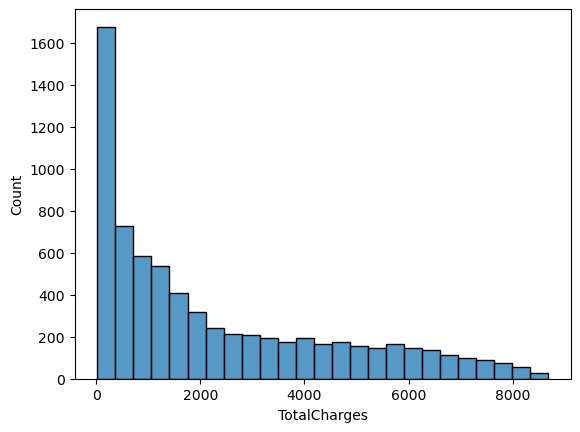

In [79]:
sb.histplot(valuesToPlot[1])

<Axes: >

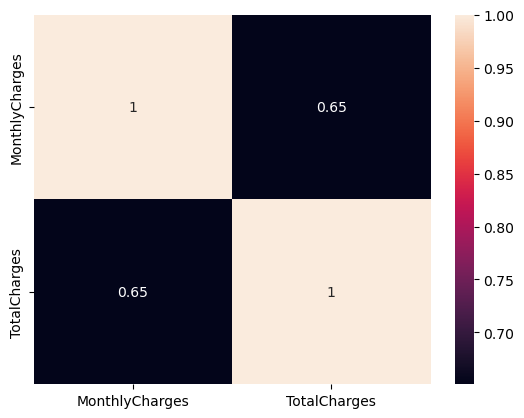

In [80]:
R1 = np.corrcoef(valuesToPlot)
axis_labels = indicators = ['MonthlyCharges', 'TotalCharges']
sb.heatmap(R1, xticklabels = axis_labels, yticklabels = axis_labels, annot=True)

# Train-test

In [81]:
from sklearn.model_selection import train_test_split

X_fields = [
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'MultipleLines',
    'PhoneService',
    'InternetService',
    'OnlineSecurity',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod',
    'MonthlyCharges',
    'TotalCharges'
]

Y_fields = ['Churn']

X = df[X_fields]
Y = df[Y_fields]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

# Boosting

In [131]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
Y_preds_gb = xgb_clf.predict(X_test)
Y_scores_gb = xgb_clf.predict_proba(X_test)
print('ok')   


ok


In [132]:

from catboost import CatBoostClassifier
ctb_clf = CatBoostClassifier()
ctb_clf.fit(X_train, y_train)
Y_preds_ctb = ctb_clf.predict(X_test)
Y_scores_ctb = ctb_clf.predict_proba(X_test)
print('ok')   

Learning rate set to 0.02036
0:	learn: 0.6792577	total: 1.82ms	remaining: 1.82s
1:	learn: 0.6654497	total: 3.1ms	remaining: 1.54s
2:	learn: 0.6518373	total: 4.47ms	remaining: 1.49s
3:	learn: 0.6396200	total: 6.05ms	remaining: 1.5s
4:	learn: 0.6279249	total: 7.38ms	remaining: 1.47s
5:	learn: 0.6163109	total: 8.76ms	remaining: 1.45s
6:	learn: 0.6061165	total: 10.3ms	remaining: 1.46s
7:	learn: 0.5967772	total: 13.3ms	remaining: 1.65s
8:	learn: 0.5879010	total: 15.7ms	remaining: 1.73s
9:	learn: 0.5790225	total: 17.7ms	remaining: 1.75s
10:	learn: 0.5712724	total: 19.6ms	remaining: 1.76s
11:	learn: 0.5633622	total: 21.5ms	remaining: 1.77s
12:	learn: 0.5561571	total: 24ms	remaining: 1.82s
13:	learn: 0.5489698	total: 25.8ms	remaining: 1.82s
14:	learn: 0.5429095	total: 27.3ms	remaining: 1.79s
15:	learn: 0.5364393	total: 29.6ms	remaining: 1.82s
16:	learn: 0.5313493	total: 31.4ms	remaining: 1.81s
17:	learn: 0.5258707	total: 33ms	remaining: 1.8s
18:	learn: 0.5208450	total: 34.6ms	remaining: 1.79s


213:	learn: 0.3786451	total: 394ms	remaining: 1.45s
214:	learn: 0.3785294	total: 396ms	remaining: 1.44s
215:	learn: 0.3783293	total: 397ms	remaining: 1.44s
216:	learn: 0.3781583	total: 399ms	remaining: 1.44s
217:	learn: 0.3780002	total: 400ms	remaining: 1.43s
218:	learn: 0.3779842	total: 401ms	remaining: 1.43s
219:	learn: 0.3779713	total: 402ms	remaining: 1.43s
220:	learn: 0.3779600	total: 424ms	remaining: 1.5s
221:	learn: 0.3778773	total: 426ms	remaining: 1.49s
222:	learn: 0.3776213	total: 427ms	remaining: 1.49s
223:	learn: 0.3774141	total: 438ms	remaining: 1.52s
224:	learn: 0.3773945	total: 439ms	remaining: 1.51s
225:	learn: 0.3771934	total: 440ms	remaining: 1.51s
226:	learn: 0.3771046	total: 442ms	remaining: 1.5s
227:	learn: 0.3769331	total: 445ms	remaining: 1.5s
228:	learn: 0.3767799	total: 446ms	remaining: 1.5s
229:	learn: 0.3766676	total: 448ms	remaining: 1.5s
230:	learn: 0.3765455	total: 450ms	remaining: 1.5s
231:	learn: 0.3765423	total: 451ms	remaining: 1.49s
232:	learn: 0.3764

416:	learn: 0.3539317	total: 789ms	remaining: 1.1s
417:	learn: 0.3538173	total: 790ms	remaining: 1.1s
418:	learn: 0.3536834	total: 792ms	remaining: 1.1s
419:	learn: 0.3534881	total: 795ms	remaining: 1.1s
420:	learn: 0.3533292	total: 797ms	remaining: 1.1s
421:	learn: 0.3531762	total: 799ms	remaining: 1.09s
422:	learn: 0.3530177	total: 801ms	remaining: 1.09s
423:	learn: 0.3529872	total: 803ms	remaining: 1.09s
424:	learn: 0.3529224	total: 806ms	remaining: 1.09s
425:	learn: 0.3528189	total: 809ms	remaining: 1.09s
426:	learn: 0.3527566	total: 811ms	remaining: 1.09s
427:	learn: 0.3526679	total: 812ms	remaining: 1.08s
428:	learn: 0.3525547	total: 814ms	remaining: 1.08s
429:	learn: 0.3523788	total: 816ms	remaining: 1.08s
430:	learn: 0.3522994	total: 817ms	remaining: 1.08s
431:	learn: 0.3522636	total: 819ms	remaining: 1.08s
432:	learn: 0.3520943	total: 823ms	remaining: 1.08s
433:	learn: 0.3520313	total: 825ms	remaining: 1.07s
434:	learn: 0.3518829	total: 827ms	remaining: 1.07s
435:	learn: 0.351

627:	learn: 0.3317253	total: 1.19s	remaining: 702ms
628:	learn: 0.3316266	total: 1.19s	remaining: 702ms
629:	learn: 0.3315239	total: 1.19s	remaining: 700ms
630:	learn: 0.3314842	total: 1.19s	remaining: 698ms
631:	learn: 0.3313659	total: 1.2s	remaining: 696ms
632:	learn: 0.3312757	total: 1.2s	remaining: 694ms
633:	learn: 0.3311183	total: 1.2s	remaining: 692ms
634:	learn: 0.3310769	total: 1.2s	remaining: 690ms
635:	learn: 0.3309869	total: 1.2s	remaining: 688ms
636:	learn: 0.3308761	total: 1.2s	remaining: 686ms
637:	learn: 0.3307241	total: 1.21s	remaining: 685ms
638:	learn: 0.3306342	total: 1.21s	remaining: 683ms
639:	learn: 0.3305193	total: 1.21s	remaining: 681ms
640:	learn: 0.3304603	total: 1.21s	remaining: 679ms
641:	learn: 0.3304124	total: 1.21s	remaining: 677ms
642:	learn: 0.3303507	total: 1.22s	remaining: 675ms
643:	learn: 0.3302974	total: 1.22s	remaining: 673ms
644:	learn: 0.3302083	total: 1.22s	remaining: 670ms
645:	learn: 0.3301140	total: 1.22s	remaining: 668ms
646:	learn: 0.3300

832:	learn: 0.3148981	total: 1.58s	remaining: 317ms
833:	learn: 0.3148343	total: 1.58s	remaining: 315ms
834:	learn: 0.3147383	total: 1.59s	remaining: 314ms
835:	learn: 0.3146923	total: 1.59s	remaining: 312ms
836:	learn: 0.3146101	total: 1.59s	remaining: 310ms
837:	learn: 0.3144851	total: 1.59s	remaining: 308ms
838:	learn: 0.3144051	total: 1.59s	remaining: 306ms
839:	learn: 0.3142810	total: 1.6s	remaining: 304ms
840:	learn: 0.3141802	total: 1.6s	remaining: 302ms
841:	learn: 0.3140731	total: 1.6s	remaining: 300ms
842:	learn: 0.3139940	total: 1.6s	remaining: 298ms
843:	learn: 0.3139370	total: 1.6s	remaining: 296ms
844:	learn: 0.3139202	total: 1.6s	remaining: 294ms
845:	learn: 0.3137941	total: 1.61s	remaining: 293ms
846:	learn: 0.3136801	total: 1.61s	remaining: 291ms
847:	learn: 0.3135839	total: 1.61s	remaining: 289ms
848:	learn: 0.3135568	total: 1.61s	remaining: 287ms
849:	learn: 0.3134739	total: 1.61s	remaining: 285ms
850:	learn: 0.3133205	total: 1.62s	remaining: 283ms
851:	learn: 0.3131

In [133]:
from lightgbm import LGBMClassifier
lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train, y_train.values.ravel())
Y_preds_lgb = lgb_clf.predict(X_test)
Y_scores_lgb = lgb_clf.predict_proba(X_test)


[LightGBM] [Info] Number of positive: 1316, number of negative: 3614
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 548
[LightGBM] [Info] Number of data points in the train set: 4930, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266937 -> initscore=-1.010218
[LightGBM] [Info] Start training from score -1.010218


# Метрики

In [134]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve, auc


# XGBoost

XGBoost: 
accuracy:  0.7823000473260767
recall:  0.7049015857560161
f1_score:  0.7103719948986282
precision:  0.7170908648780092
ROCAUC:  0.8186703064867622


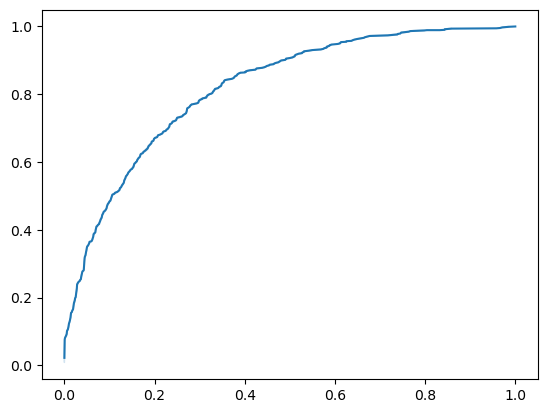

In [135]:
print("XGBoost: ")

accuracy_gb = accuracy_score(y_test, Y_preds_gb)
print("accuracy: ", accuracy_gb)

recall_gb = recall_score(y_test, Y_preds_gb, average='macro')
print("recall: ", recall_gb)

f1_score_gb = f1_score(y_test, Y_preds_gb, average='macro')
print("f1_score: ", f1_score_gb)

precision_gb = precision_score(y_test, Y_preds_gb, average='macro')
print("precision: ", precision_gb)

fpr, tpr, threshold = roc_curve(y_test, Y_scores_gb[:, 1])
roc_auc = auc(fpr, tpr)
sb.lineplot(x = fpr, y = tpr)

print("ROCAUC: ", roc_auc)


# CatBoost

CatBoost: 
accuracy:  0.7946048272598202
recall:  0.7050638707284277
f1_score:  0.7169029302446193
precision:  0.735251602436235
ROCAUC:  0.8337494783697316


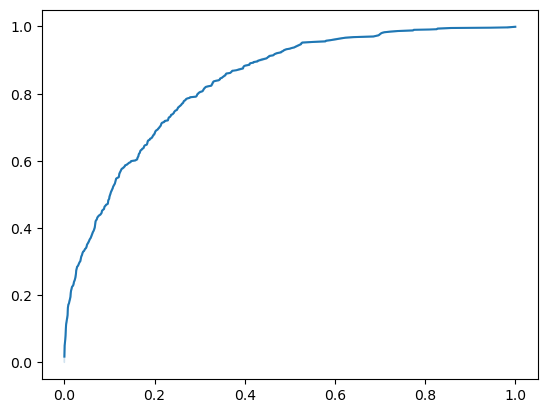

In [136]:
print("CatBoost: ")

accuracy_ctb = accuracy_score(y_test, Y_preds_ctb)
print("accuracy: ", accuracy_ctb)

recall_ctb = recall_score(y_test, Y_preds_ctb, average='macro')
print("recall: ", recall_ctb)

f1_score_ctb = f1_score(y_test, Y_preds_ctb, average='macro')
print("f1_score: ", f1_score_ctb)

precision_ctb = precision_score(y_test, Y_preds_ctb, average='macro')
print("precision: ", precision_ctb)

fpr, tpr, threshold = roc_curve(y_test, Y_scores_ctb[:, 1])
roc_auc = auc(fpr, tpr)
sb.lineplot(x = fpr, y = tpr)

print("ROCAUC: ", roc_auc)

# Lightgbm

Lightgbm: 
accuracy:  0.795551348793185
recall:  0.7050638707284277
f1_score:  0.7245110821382008
precision:  0.7355467240504028
ROCAUC:  0.8300621319608661


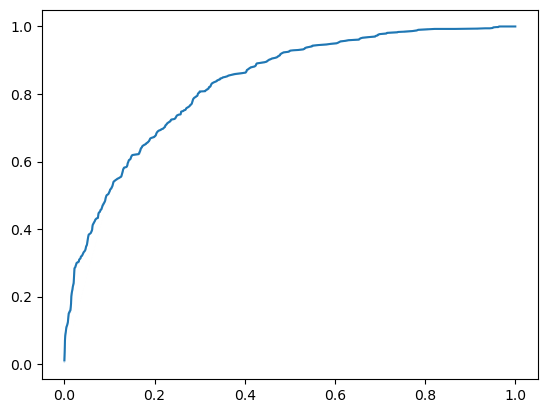

In [137]:
print("Lightgbm: ")

accuracy_lgb = accuracy_score(y_test, Y_preds_lgb)
print("accuracy: ", accuracy_lgb)

recall_lgb = recall_score(y_test, Y_preds_lgb, average='macro')
print("recall: ", recall_ctb)

f1_score_lgb = f1_score(y_test, Y_preds_lgb, average='macro')
print("f1_score: ", f1_score_lgb)

precision_lgb = precision_score(y_test, Y_preds_lgb, average='macro')
print("precision: ", precision_lgb)

fpr, tpr, threshold = roc_curve(y_test, Y_scores_lgb[:, 1])
roc_auc = auc(fpr, tpr)
sb.lineplot(x = fpr, y = tpr)

print("ROCAUC: ", roc_auc)

# Кросс-валидация

In [138]:
from sklearn.model_selection import GridSearchCV

In [139]:
metircs = ["accuracy", "recall", "f1_score", "preccission", "roc_auc"]
params = {
        'learning_rate': [0.03, 0.06],
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        } 

xgb_clf = XGBClassifier()
#Y_preds_gb = xgb_clf.predict(X_test)

xgb_clf_cv = GridSearchCV(estimator = xgb_clf, param_grid = params, cv = 3, verbose=True, n_jobs=-1)
xgb_clf_cv.fit(X_train, y_train)

Y_preds_xgb = xgb_clf_cv.predict(X_test)
Y_scores_xgb = xgb_clf_cv.predict_proba(X_test)

Fitting 3 folds for each of 810 candidates, totalling 2430 fits


XGBoost: 
accuracy:  0.8050165641268339
recall:  0.7150333843371819
f1_score:  0.7290189154730362
precision:  0.751582690492465
ROCAUC:  0.8420746974544444


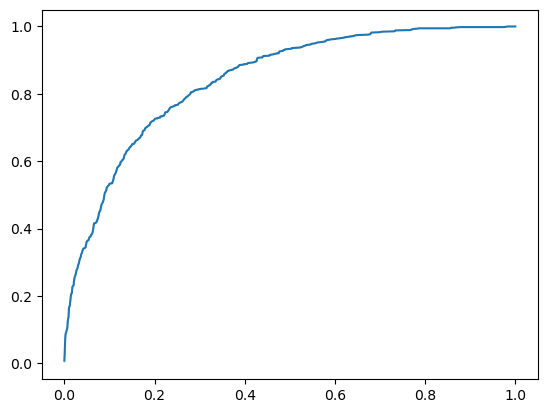

In [141]:
print("XGBoost: ")

accuracy_gb = accuracy_score(y_test, Y_preds_xgb)
print("accuracy: ", accuracy_gb)

recall_gb = recall_score(y_test, Y_preds_xgb, average='macro')
print("recall: ", recall_gb)

f1_score_gb = f1_score(y_test, Y_preds_xgb, average='macro')
print("f1_score: ", f1_score_gb)

precision_gb = precision_score(y_test, Y_preds_xgb, average='macro')
print("precision: ", precision_gb)

fpr, tpr, threshold = roc_curve(y_test, Y_scores_xgb[:, 1])
roc_auc = auc(fpr, tpr)
sb.lineplot(x = fpr, y = tpr)

print("ROCAUC: ", roc_auc)

#Without CV
#accuracy:  0.7823000473260767
#recall:  0.7049015857560161
#f1_score:  0.7103719948986282
#precision:  0.7170908648780092
#ROCAUC:  0.8186703064867622

In [145]:
metircs = ["accuracy", "recall", "f1_score", "preccission", "roc_auc"]
params = {
        'learning_rate': [0.03, 0.06, 0.1],
        'iterations': [1, 10, 20],
        'l2_leaf_reg': [2, 3, 4],
        'depth': [3, 4, 5],
        'boosting_type': ['Ordered', 'Plain']
        } 

cb_clf = CatBoostClassifier()
#Y_preds_gb = xgb_clf.predict(X_test)

cb_clf_cv = GridSearchCV(estimator = cb_clf, param_grid = params, cv = 3, verbose=True, n_jobs=-1)
cb_clf_cv.fit(X_train, y_train)

Y_preds_cb = cb_clf_cv.predict(X_test)
Y_scores_cb = cb_clf_cv.predict_proba(X_test)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
2:	learn: 0.6031585	total: 1.43ms	remaining: 8.11ms
3:	learn: 0.5803327	total: 1.89ms	remaining: 7.56ms
4:	learn: 0.5617253	total: 5.04ms	remaining: 15.1ms
5:	learn: 0.5453879	total: 5.5ms	remaining: 12.8ms
6:	learn: 0.5295068	total: 5.96ms	remaining: 11.1ms
7:	learn: 0.5160664	total: 6.41ms	remaining: 9.62ms
8:	learn: 0.5045312	total: 8.8ms	remaining: 10.8ms
9:	learn: 0.4948673	total: 10.1ms	remaining: 10.1ms
10:	learn: 0.4867337	total: 10.6ms	remaining: 8.63ms
11:	learn: 0.4800105	total: 11.2ms	remaining: 7.43ms
12:	learn: 0.4733775	total: 11.6ms	remaining: 6.26ms
13:	learn: 0.4659651	total: 12.1ms	remaining: 5.18ms
14:	learn: 0.4606990	total: 12.6ms	remaining: 4.19ms
15:	learn: 0.4564152	total: 13ms	remaining: 3.25ms
16:	learn: 0.4519102	total: 13.5ms	remaining: 2.38ms
17:	learn: 0.4481369	total: 13.9ms	remaining: 1.54ms
18:	learn: 0.4446030	total: 14.3ms	remaining: 754us
19:	learn: 0.4414018	total: 14.8ms	remaining: 0u


[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightG

[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGB

[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: iterations
[Li

[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: iterations
[Li

5:	learn: 0.6343884	total: 8.52ms	remaining: 19.9ms
6:	learn: 0.6262921	total: 10.5ms	remaining: 19.5ms
7:	learn: 0.6185909	total: 11.5ms	remaining: 17.2ms
8:	learn: 0.6117034	total: 12.4ms	remaining: 15.1ms
9:	learn: 0.6049340	total: 13.4ms	remaining: 13.4ms
10:	learn: 0.5985413	total: 15ms	remaining: 12.3ms
11:	learn: 0.5919609	total: 17.5ms	remaining: 11.7ms
12:	learn: 0.5860505	total: 18.4ms	remaining: 9.88ms
13:	learn: 0.5805097	total: 20.7ms	remaining: 8.88ms
14:	learn: 0.5749880	total: 23.5ms	remaining: 7.84ms
15:	learn: 0.5700010	total: 25ms	remaining: 6.24ms
16:	learn: 0.5645898	total: 26ms	remaining: 4.58ms
17:	learn: 0.5604131	total: 27.2ms	remaining: 3.02ms
18:	learn: 0.5555926	total: 28.7ms	remaining: 1.51ms
19:	learn: 0.5506244	total: 30.5ms	remaining: 0us
0:	learn: 0.6818450	total: 1.02ms	remaining: 19.4ms
1:	learn: 0.6712539	total: 1.99ms	remaining: 17.9ms
2:	learn: 0.6617990	total: 2.96ms	remaining: 16.8ms
3:	learn: 0.6530111	total: 7.58ms	remaining: 30.3ms
4:	learn: 0

17:	learn: 0.4962718	total: 18.8ms	remaining: 23ms
18:	learn: 0.4920759	total: 19.8ms	remaining: 21.9ms
19:	learn: 0.4870215	total: 20.8ms	remaining: 20.8ms
20:	learn: 0.4829356	total: 22ms	remaining: 19.9ms
21:	learn: 0.4795093	total: 23ms	remaining: 18.9ms
22:	learn: 0.4759160	total: 24.4ms	remaining: 18ms
23:	learn: 0.4724186	total: 29ms	remaining: 19.3ms
24:	learn: 0.4691889	total: 30.4ms	remaining: 18.2ms
25:	learn: 0.4667187	total: 31.4ms	remaining: 16.9ms
26:	learn: 0.4636499	total: 32.5ms	remaining: 15.6ms
27:	learn: 0.4605159	total: 33.5ms	remaining: 14.4ms
28:	learn: 0.4583918	total: 35.4ms	remaining: 13.4ms
29:	learn: 0.4555171	total: 36.4ms	remaining: 12.1ms
30:	learn: 0.4531197	total: 37.3ms	remaining: 10.8ms
31:	learn: 0.4513109	total: 38.3ms	remaining: 9.58ms
32:	learn: 0.4492567	total: 48ms	remaining: 10.2ms
33:	learn: 0.4475142	total: 71.8ms	remaining: 12.7ms
34:	learn: 0.4460377	total: 119ms	remaining: 17.1ms
35:	learn: 0.4439922	total: 121ms	remaining: 13.4ms
36:	lea

33:	learn: 0.4470920	total: 54.2ms	remaining: 25.5ms
34:	learn: 0.4455044	total: 64.3ms	remaining: 27.6ms
35:	learn: 0.4433974	total: 69.9ms	remaining: 27.2ms
36:	learn: 0.4418305	total: 71ms	remaining: 24.9ms
37:	learn: 0.4403627	total: 72ms	remaining: 22.7ms
38:	learn: 0.4391171	total: 72.9ms	remaining: 20.6ms
39:	learn: 0.4373338	total: 73.9ms	remaining: 18.5ms
40:	learn: 0.4361433	total: 74.8ms	remaining: 16.4ms
41:	learn: 0.4350376	total: 75.7ms	remaining: 14.4ms
42:	learn: 0.4340782	total: 76.7ms	remaining: 12.5ms
43:	learn: 0.4329205	total: 77.6ms	remaining: 10.6ms
44:	learn: 0.4315511	total: 78.6ms	remaining: 8.73ms
45:	learn: 0.4304714	total: 79.5ms	remaining: 6.91ms
46:	learn: 0.4294129	total: 80.5ms	remaining: 5.14ms
47:	learn: 0.4284890	total: 82.4ms	remaining: 3.43ms
48:	learn: 0.4278672	total: 87.4ms	remaining: 1.78ms
49:	learn: 0.4271621	total: 88.5ms	remaining: 0us
0:	learn: 0.6704487	total: 1.08ms	remaining: 52.9ms
1:	learn: 0.6504138	total: 2.04ms	remaining: 49.1ms
2:

38:	learn: 0.4413328	total: 54.4ms	remaining: 15.3ms
39:	learn: 0.4397144	total: 55.3ms	remaining: 13.8ms
40:	learn: 0.4387424	total: 56.3ms	remaining: 12.4ms
41:	learn: 0.4373701	total: 57.3ms	remaining: 10.9ms
42:	learn: 0.4362452	total: 58.2ms	remaining: 9.48ms
43:	learn: 0.4354216	total: 60.6ms	remaining: 8.26ms
44:	learn: 0.4344794	total: 61.6ms	remaining: 6.84ms
45:	learn: 0.4328584	total: 62.5ms	remaining: 5.44ms
46:	learn: 0.4318617	total: 64.3ms	remaining: 4.1ms
47:	learn: 0.4310721	total: 67.5ms	remaining: 2.81ms
48:	learn: 0.4301278	total: 68.7ms	remaining: 1.4ms
49:	learn: 0.4296378	total: 69.7ms	remaining: 0us
0:	learn: 0.6580347	total: 979us	remaining: 48ms
1:	learn: 0.6281998	total: 1.93ms	remaining: 46.4ms
2:	learn: 0.6018950	total: 2.91ms	remaining: 45.6ms
3:	learn: 0.5818799	total: 3.85ms	remaining: 44.3ms
4:	learn: 0.5637667	total: 4.82ms	remaining: 43.3ms
5:	learn: 0.5486771	total: 5.8ms	remaining: 42.5ms
6:	learn: 0.5350661	total: 6.77ms	remaining: 41.6ms
7:	learn:

20:	learn: 0.4471574	total: 97.7ms	remaining: 228ms
21:	learn: 0.4450509	total: 98.7ms	remaining: 215ms
22:	learn: 0.4427754	total: 99.7ms	remaining: 204ms
23:	learn: 0.4410688	total: 101ms	remaining: 193ms
24:	learn: 0.4381841	total: 102ms	remaining: 183ms
25:	learn: 0.4357707	total: 103ms	remaining: 174ms
26:	learn: 0.4338582	total: 104ms	remaining: 166ms
27:	learn: 0.4317022	total: 105ms	remaining: 157ms
28:	learn: 0.4298876	total: 108ms	remaining: 152ms
29:	learn: 0.4280491	total: 111ms	remaining: 148ms
30:	learn: 0.4262317	total: 116ms	remaining: 145ms
31:	learn: 0.4249755	total: 117ms	remaining: 139ms
32:	learn: 0.4236416	total: 118ms	remaining: 132ms
33:	learn: 0.4227127	total: 119ms	remaining: 126ms
34:	learn: 0.4217980	total: 120ms	remaining: 120ms
35:	learn: 0.4208058	total: 121ms	remaining: 114ms
36:	learn: 0.4198403	total: 121ms	remaining: 108ms
37:	learn: 0.4188732	total: 122ms	remaining: 103ms
38:	learn: 0.4180378	total: 123ms	remaining: 98.2ms
39:	learn: 0.4170942	total:

67:	learn: 0.4188218	total: 102ms	remaining: 3.01ms
68:	learn: 0.4183200	total: 108ms	remaining: 1.57ms
69:	learn: 0.4176995	total: 115ms	remaining: 0us
0:	learn: 0.6576910	total: 949us	remaining: 65.5ms
1:	learn: 0.6277660	total: 2.21ms	remaining: 75.1ms
2:	learn: 0.6013155	total: 3.11ms	remaining: 69.5ms
3:	learn: 0.5812094	total: 4.04ms	remaining: 66.7ms
4:	learn: 0.5630167	total: 5.04ms	remaining: 65.5ms
5:	learn: 0.5478770	total: 6.04ms	remaining: 64.4ms
6:	learn: 0.5342149	total: 6.99ms	remaining: 62.9ms
7:	learn: 0.5226692	total: 15ms	remaining: 116ms
8:	learn: 0.5115951	total: 16ms	remaining: 109ms
9:	learn: 0.5032851	total: 17ms	remaining: 102ms
10:	learn: 0.4961694	total: 18ms	remaining: 96.3ms
11:	learn: 0.4870155	total: 18.9ms	remaining: 91.5ms
12:	learn: 0.4793711	total: 20.2ms	remaining: 88.4ms
13:	learn: 0.4737852	total: 21.4ms	remaining: 85.4ms
14:	learn: 0.4681387	total: 22.4ms	remaining: 82.1ms
15:	learn: 0.4639677	total: 23.4ms	remaining: 79ms
16:	learn: 0.4591591	to

38:	learn: 0.4133292	total: 117ms	remaining: 182ms
39:	learn: 0.4126886	total: 120ms	remaining: 180ms
40:	learn: 0.4116953	total: 121ms	remaining: 174ms
41:	learn: 0.4109541	total: 122ms	remaining: 169ms
42:	learn: 0.4102254	total: 123ms	remaining: 163ms
43:	learn: 0.4095072	total: 124ms	remaining: 158ms
44:	learn: 0.4087971	total: 125ms	remaining: 153ms
45:	learn: 0.4081103	total: 126ms	remaining: 148ms
46:	learn: 0.4078318	total: 127ms	remaining: 143ms
47:	learn: 0.4076000	total: 128ms	remaining: 138ms
48:	learn: 0.4071993	total: 129ms	remaining: 134ms
49:	learn: 0.4062733	total: 130ms	remaining: 130ms
50:	learn: 0.4057516	total: 131ms	remaining: 126ms
51:	learn: 0.4052812	total: 132ms	remaining: 122ms
52:	learn: 0.4046126	total: 133ms	remaining: 118ms
53:	learn: 0.4042092	total: 136ms	remaining: 116ms
54:	learn: 0.4038044	total: 138ms	remaining: 113ms
55:	learn: 0.4034661	total: 139ms	remaining: 109ms
56:	learn: 0.4033578	total: 140ms	remaining: 106ms
57:	learn: 0.4029659	total: 142

33:	learn: 0.4194935	total: 68.9ms	remaining: 134ms
34:	learn: 0.4185434	total: 69.9ms	remaining: 130ms
35:	learn: 0.4179646	total: 70.8ms	remaining: 126ms
36:	learn: 0.4170545	total: 71.8ms	remaining: 122ms
37:	learn: 0.4159907	total: 72.8ms	remaining: 119ms
38:	learn: 0.4151828	total: 73.7ms	remaining: 115ms
39:	learn: 0.4143207	total: 74.6ms	remaining: 112ms
40:	learn: 0.4132206	total: 75.6ms	remaining: 109ms
41:	learn: 0.4124597	total: 76.5ms	remaining: 106ms
42:	learn: 0.4117461	total: 79.1ms	remaining: 105ms
43:	learn: 0.4109888	total: 81.1ms	remaining: 103ms
44:	learn: 0.4107129	total: 82.4ms	remaining: 101ms
45:	learn: 0.4099658	total: 83.3ms	remaining: 97.8ms
46:	learn: 0.4096905	total: 84.3ms	remaining: 95ms
47:	learn: 0.4094309	total: 85.2ms	remaining: 92.3ms
48:	learn: 0.4091025	total: 86.1ms	remaining: 89.7ms
49:	learn: 0.4083278	total: 87.1ms	remaining: 87.1ms
50:	learn: 0.4077508	total: 88.3ms	remaining: 84.8ms
51:	learn: 0.4072693	total: 89.2ms	remaining: 82.3ms
52:	lea

17:	learn: 0.4446892	total: 34.9ms	remaining: 3.88ms
18:	learn: 0.4406235	total: 37.7ms	remaining: 1.98ms
19:	learn: 0.4373646	total: 41.9ms	remaining: 0us
0:	learn: 0.6600363	total: 789us	remaining: 15ms
1:	learn: 0.6299067	total: 2ms	remaining: 18ms
2:	learn: 0.6013663	total: 3.42ms	remaining: 19.4ms
3:	learn: 0.5780462	total: 4.69ms	remaining: 18.8ms
4:	learn: 0.5575267	total: 6ms	remaining: 18ms
5:	learn: 0.5415587	total: 6.9ms	remaining: 16.1ms
6:	learn: 0.5277235	total: 17.5ms	remaining: 32.6ms
7:	learn: 0.5146235	total: 38.8ms	remaining: 58.2ms
8:	learn: 0.5042846	total: 40.7ms	remaining: 49.7ms
9:	learn: 0.4940751	total: 41.9ms	remaining: 41.9ms
10:	learn: 0.4857994	total: 43.9ms	remaining: 35.9ms
11:	learn: 0.4776660	total: 45.2ms	remaining: 30.1ms
12:	learn: 0.4707676	total: 46.4ms	remaining: 25ms
13:	learn: 0.4648993	total: 47.7ms	remaining: 20.4ms
14:	learn: 0.4590682	total: 49ms	remaining: 16.3ms
15:	learn: 0.4546583	total: 50.9ms	remaining: 12.7ms
16:	learn: 0.4504420	tot

22:	learn: 0.4366667	total: 68.2ms	remaining: 20.8ms
23:	learn: 0.4347112	total: 69.5ms	remaining: 17.4ms
24:	learn: 0.4327405	total: 70.8ms	remaining: 14.2ms
25:	learn: 0.4305000	total: 74ms	remaining: 11.4ms
26:	learn: 0.4289255	total: 75.2ms	remaining: 8.35ms
27:	learn: 0.4272229	total: 76.7ms	remaining: 5.48ms
28:	learn: 0.4258139	total: 77.7ms	remaining: 2.68ms
29:	learn: 0.4243858	total: 82.8ms	remaining: 0us
0:	learn: 0.6568999	total: 1.32ms	remaining: 38.4ms
1:	learn: 0.6259971	total: 2.57ms	remaining: 35.9ms
2:	learn: 0.6001636	total: 3.78ms	remaining: 34ms
3:	learn: 0.5760728	total: 5.18ms	remaining: 33.7ms
4:	learn: 0.5577770	total: 33.7ms	remaining: 168ms
5:	learn: 0.5435445	total: 64.1ms	remaining: 257ms
6:	learn: 0.5306318	total: 65.4ms	remaining: 215ms
7:	learn: 0.5172115	total: 66.7ms	remaining: 183ms
8:	learn: 0.5074661	total: 68ms	remaining: 159ms
9:	learn: 0.4978642	total: 69.4ms	remaining: 139ms
10:	learn: 0.4889762	total: 70.7ms	remaining: 122ms
11:	learn: 0.480405

37:	learn: 0.4334478	total: 52.6ms	remaining: 2.77ms
38:	learn: 0.4330890	total: 53.4ms	remaining: 1.37ms
39:	learn: 0.4315507	total: 54.7ms	remaining: 0us
0:	learn: 0.6566952	total: 1.35ms	remaining: 52.7ms
1:	learn: 0.6290001	total: 2.13ms	remaining: 40.5ms
2:	learn: 0.6020577	total: 3.35ms	remaining: 41.3ms
3:	learn: 0.5803046	total: 4.54ms	remaining: 40.9ms
4:	learn: 0.5616496	total: 5.86ms	remaining: 41.1ms
5:	learn: 0.5449144	total: 7.11ms	remaining: 40.3ms
6:	learn: 0.5287981	total: 8.35ms	remaining: 39.4ms
7:	learn: 0.5157091	total: 9.61ms	remaining: 38.4ms
8:	learn: 0.5053381	total: 10.8ms	remaining: 37.4ms
9:	learn: 0.4962524	total: 12.1ms	remaining: 36.3ms
10:	learn: 0.4886878	total: 15ms	remaining: 39.6ms
11:	learn: 0.4821538	total: 16.3ms	remaining: 38.1ms
12:	learn: 0.4746896	total: 17.6ms	remaining: 36.5ms
13:	learn: 0.4688105	total: 18.9ms	remaining: 35.1ms
14:	learn: 0.4628535	total: 20.3ms	remaining: 33.8ms
15:	learn: 0.4583293	total: 21.7ms	remaining: 32.5ms
16:	lear

0:	learn: 0.6701970	total: 1.72ms	remaining: 84.4ms
1:	learn: 0.6491839	total: 2.78ms	remaining: 66.8ms
2:	learn: 0.6306208	total: 4.1ms	remaining: 64.3ms
3:	learn: 0.6124685	total: 5.36ms	remaining: 61.6ms
4:	learn: 0.5979478	total: 6.31ms	remaining: 56.8ms
5:	learn: 0.5858329	total: 7.28ms	remaining: 53.4ms
6:	learn: 0.5741733	total: 8.51ms	remaining: 52.3ms
7:	learn: 0.5621005	total: 9.77ms	remaining: 51.3ms
8:	learn: 0.5516259	total: 11ms	remaining: 50.2ms
9:	learn: 0.5423176	total: 12.3ms	remaining: 49.2ms
10:	learn: 0.5331455	total: 13.5ms	remaining: 48ms
11:	learn: 0.5248384	total: 14.8ms	remaining: 47ms
12:	learn: 0.5176772	total: 16.1ms	remaining: 45.9ms
13:	learn: 0.5103471	total: 17.4ms	remaining: 44.6ms
14:	learn: 0.5039205	total: 18.6ms	remaining: 43.4ms
15:	learn: 0.4971481	total: 19.8ms	remaining: 42.2ms
16:	learn: 0.4909369	total: 21.1ms	remaining: 40.9ms
17:	learn: 0.4865284	total: 23ms	remaining: 40.9ms
18:	learn: 0.4817973	total: 25.8ms	remaining: 42.1ms
19:	learn: 0

46:	learn: 0.4225694	total: 71.9ms	remaining: 35.2ms
47:	learn: 0.4218271	total: 73.4ms	remaining: 33.6ms
48:	learn: 0.4206109	total: 74.7ms	remaining: 32ms
49:	learn: 0.4198169	total: 76ms	remaining: 30.4ms
50:	learn: 0.4187311	total: 78ms	remaining: 29ms
51:	learn: 0.4180921	total: 79.3ms	remaining: 27.4ms
52:	learn: 0.4172739	total: 80.5ms	remaining: 25.8ms
53:	learn: 0.4163990	total: 83.3ms	remaining: 24.7ms
54:	learn: 0.4158776	total: 85.4ms	remaining: 23.3ms
55:	learn: 0.4151326	total: 86.6ms	remaining: 21.7ms
56:	learn: 0.4148866	total: 87.8ms	remaining: 20ms
57:	learn: 0.4141005	total: 89.1ms	remaining: 18.4ms
58:	learn: 0.4135089	total: 90.4ms	remaining: 16.8ms
59:	learn: 0.4129612	total: 93.3ms	remaining: 15.6ms
60:	learn: 0.4122243	total: 94.5ms	remaining: 13.9ms
61:	learn: 0.4117032	total: 104ms	remaining: 13.4ms
62:	learn: 0.4112137	total: 106ms	remaining: 11.8ms
63:	learn: 0.4105864	total: 108ms	remaining: 10.1ms
64:	learn: 0.4100084	total: 109ms	remaining: 8.37ms
65:	lea

71:	learn: 0.4022641	total: 147ms	remaining: 57.1ms
72:	learn: 0.4019606	total: 148ms	remaining: 54.8ms
73:	learn: 0.4016363	total: 149ms	remaining: 52.5ms
74:	learn: 0.4014443	total: 152ms	remaining: 50.7ms
75:	learn: 0.4012528	total: 156ms	remaining: 49.1ms
76:	learn: 0.4010648	total: 157ms	remaining: 47ms
77:	learn: 0.4008854	total: 158ms	remaining: 44.7ms
78:	learn: 0.4004600	total: 160ms	remaining: 42.4ms
79:	learn: 0.4003542	total: 161ms	remaining: 40.1ms
80:	learn: 0.4000053	total: 162ms	remaining: 38ms
81:	learn: 0.3997412	total: 166ms	remaining: 36.4ms
82:	learn: 0.3994433	total: 168ms	remaining: 34.4ms
83:	learn: 0.3991055	total: 169ms	remaining: 32.2ms
84:	learn: 0.3988353	total: 170ms	remaining: 30.1ms
85:	learn: 0.3985813	total: 171ms	remaining: 27.9ms
86:	learn: 0.3985432	total: 173ms	remaining: 25.9ms
87:	learn: 0.3985103	total: 176ms	remaining: 24ms
88:	learn: 0.3984393	total: 177ms	remaining: 21.9ms
89:	learn: 0.3982807	total: 178ms	remaining: 19.8ms
90:	learn: 0.39792

76:	learn: 0.4003400	total: 144ms	remaining: 42.9ms
77:	learn: 0.4000662	total: 145ms	remaining: 40.9ms
78:	learn: 0.3995295	total: 146ms	remaining: 38.9ms
79:	learn: 0.3994916	total: 148ms	remaining: 37ms
80:	learn: 0.3990320	total: 149ms	remaining: 35ms
81:	learn: 0.3988365	total: 151ms	remaining: 33.1ms
82:	learn: 0.3986293	total: 152ms	remaining: 31.1ms
83:	learn: 0.3983637	total: 153ms	remaining: 29.2ms
84:	learn: 0.3982224	total: 155ms	remaining: 27.3ms
85:	learn: 0.3979961	total: 156ms	remaining: 25.3ms
86:	learn: 0.3976880	total: 157ms	remaining: 23.5ms
87:	learn: 0.3976007	total: 158ms	remaining: 21.6ms
88:	learn: 0.3975426	total: 159ms	remaining: 19.7ms
89:	learn: 0.3973780	total: 161ms	remaining: 17.8ms
90:	learn: 0.3971705	total: 163ms	remaining: 16.2ms
91:	learn: 0.3970614	total: 168ms	remaining: 14.6ms
92:	learn: 0.3970001	total: 170ms	remaining: 12.8ms
93:	learn: 0.3968981	total: 173ms	remaining: 11ms
94:	learn: 0.3967234	total: 176ms	remaining: 9.25ms
95:	learn: 0.39656

4:	learn: 0.6433573	total: 6.51ms	remaining: 6.51ms
5:	learn: 0.6355159	total: 8.86ms	remaining: 5.91ms
6:	learn: 0.6282233	total: 11.9ms	remaining: 5.1ms
7:	learn: 0.6204563	total: 13.6ms	remaining: 3.41ms
8:	learn: 0.6137567	total: 14.4ms	remaining: 1.6ms
9:	learn: 0.6066109	total: 16ms	remaining: 0us
0:	learn: 0.6820274	total: 1.81ms	remaining: 34.4ms
1:	learn: 0.6712791	total: 2.79ms	remaining: 25.1ms
2:	learn: 0.6609201	total: 4.54ms	remaining: 25.7ms
3:	learn: 0.6507995	total: 6.3ms	remaining: 25.2ms
4:	learn: 0.6413138	total: 8.04ms	remaining: 24.1ms
5:	learn: 0.6327042	total: 9.83ms	remaining: 22.9ms
6:	learn: 0.6245799	total: 11.6ms	remaining: 21.5ms
7:	learn: 0.6165841	total: 13.3ms	remaining: 20ms
8:	learn: 0.6091050	total: 15.1ms	remaining: 18.4ms
9:	learn: 0.6015480	total: 16.8ms	remaining: 16.8ms
10:	learn: 0.5950706	total: 18.5ms	remaining: 15.1ms
11:	learn: 0.5881268	total: 20.2ms	remaining: 13.5ms
12:	learn: 0.5819657	total: 21.9ms	remaining: 11.8ms
13:	learn: 0.575717

87:	learn: 0.4250580	total: 196ms	remaining: 26.7ms
88:	learn: 0.4245222	total: 197ms	remaining: 24.3ms
89:	learn: 0.4240011	total: 198ms	remaining: 22ms
90:	learn: 0.4232673	total: 199ms	remaining: 19.7ms
91:	learn: 0.4227212	total: 201ms	remaining: 17.4ms
92:	learn: 0.4221162	total: 202ms	remaining: 15.2ms
93:	learn: 0.4217021	total: 203ms	remaining: 13ms
94:	learn: 0.4212010	total: 204ms	remaining: 10.8ms
95:	learn: 0.4206467	total: 206ms	remaining: 8.59ms
96:	learn: 0.4201364	total: 208ms	remaining: 6.44ms
97:	learn: 0.4199345	total: 209ms	remaining: 4.26ms
98:	learn: 0.4194233	total: 212ms	remaining: 2.14ms
99:	learn: 0.4188644	total: 215ms	remaining: 0us
0:	learn: 0.6602045	total: 4.9ms	remaining: 93.1ms
1:	learn: 0.6297512	total: 19.4ms	remaining: 175ms
2:	learn: 0.6034488	total: 22.3ms	remaining: 126ms
3:	learn: 0.5813464	total: 24.1ms	remaining: 96.5ms
4:	learn: 0.5629712	total: 25.1ms	remaining: 75.3ms
5:	learn: 0.5458074	total: 30.4ms	remaining: 71ms
6:	learn: 0.5296639	tota

20:	learn: 0.5371448	total: 60ms	remaining: 54.3ms
21:	learn: 0.5340870	total: 60.9ms	remaining: 49.8ms
22:	learn: 0.5299636	total: 64.1ms	remaining: 47.4ms
23:	learn: 0.5263001	total: 69.2ms	remaining: 46.2ms
24:	learn: 0.5227388	total: 72.3ms	remaining: 43.4ms
25:	learn: 0.5187200	total: 77.1ms	remaining: 41.5ms
26:	learn: 0.5156396	total: 78ms	remaining: 37.5ms
27:	learn: 0.5125498	total: 79.2ms	remaining: 34ms
28:	learn: 0.5093584	total: 81ms	remaining: 30.7ms
29:	learn: 0.5058287	total: 82.8ms	remaining: 27.6ms
30:	learn: 0.5026180	total: 85.6ms	remaining: 24.9ms
31:	learn: 0.4996931	total: 86.9ms	remaining: 21.7ms
32:	learn: 0.4968198	total: 89ms	remaining: 18.9ms
33:	learn: 0.4939301	total: 93.4ms	remaining: 16.5ms
34:	learn: 0.4913278	total: 99.6ms	remaining: 14.2ms
35:	learn: 0.4884572	total: 102ms	remaining: 11.4ms
36:	learn: 0.4859137	total: 105ms	remaining: 8.51ms
37:	learn: 0.4838443	total: 106ms	remaining: 5.57ms
38:	learn: 0.4815632	total: 108ms	remaining: 2.77ms
39:	lea

4:	learn: 0.6015311	total: 12.4ms	remaining: 87.1ms
5:	learn: 0.5885073	total: 14.2ms	remaining: 80.5ms
6:	learn: 0.5768609	total: 16ms	remaining: 75.2ms
7:	learn: 0.5637067	total: 20.7ms	remaining: 82.7ms
8:	learn: 0.5535273	total: 22.4ms	remaining: 77.3ms
9:	learn: 0.5436229	total: 24.2ms	remaining: 72.6ms
10:	learn: 0.5359062	total: 25ms	remaining: 65.9ms
11:	learn: 0.5283880	total: 26ms	remaining: 60.6ms
12:	learn: 0.5200037	total: 27.7ms	remaining: 57.5ms
13:	learn: 0.5134208	total: 29.4ms	remaining: 54.6ms
14:	learn: 0.5062788	total: 32.2ms	remaining: 53.7ms
15:	learn: 0.5001960	total: 44.7ms	remaining: 67ms
16:	learn: 0.4939671	total: 47ms	remaining: 63.6ms
17:	learn: 0.4889344	total: 50ms	remaining: 61.1ms
18:	learn: 0.4842428	total: 51.3ms	remaining: 56.7ms
19:	learn: 0.4793688	total: 53.1ms	remaining: 53.1ms
20:	learn: 0.4752584	total: 55.3ms	remaining: 50ms
21:	learn: 0.4709767	total: 56.9ms	remaining: 46.6ms
22:	learn: 0.4675964	total: 57.9ms	remaining: 42.8ms
23:	learn: 0.

30:	learn: 0.4481516	total: 91.9ms	remaining: 116ms
31:	learn: 0.4457924	total: 93.6ms	remaining: 111ms
32:	learn: 0.4439063	total: 100ms	remaining: 112ms
33:	learn: 0.4416954	total: 102ms	remaining: 108ms
34:	learn: 0.4400272	total: 103ms	remaining: 103ms
35:	learn: 0.4384558	total: 105ms	remaining: 99.2ms
36:	learn: 0.4362066	total: 107ms	remaining: 95.2ms
37:	learn: 0.4345398	total: 109ms	remaining: 91.4ms
38:	learn: 0.4332083	total: 110ms	remaining: 87.7ms
39:	learn: 0.4316688	total: 112ms	remaining: 84ms
40:	learn: 0.4302518	total: 114ms	remaining: 80.4ms
41:	learn: 0.4288880	total: 115ms	remaining: 76.9ms
42:	learn: 0.4274315	total: 117ms	remaining: 73.6ms
43:	learn: 0.4261145	total: 119ms	remaining: 70.2ms
44:	learn: 0.4250757	total: 120ms	remaining: 66.7ms
45:	learn: 0.4243713	total: 126ms	remaining: 65.7ms
46:	learn: 0.4234028	total: 140ms	remaining: 68.4ms
47:	learn: 0.4224108	total: 145ms	remaining: 66.5ms
48:	learn: 0.4214809	total: 149ms	remaining: 63.8ms
49:	learn: 0.4206

16:	learn: 0.4980752	total: 10.4ms	remaining: 1.83ms
17:	learn: 0.4929550	total: 10.7ms	remaining: 1.19ms
18:	learn: 0.4881057	total: 11.1ms	remaining: 583us
19:	learn: 0.4838053	total: 11.4ms	remaining: 0us
0:	learn: 0.6697821	total: 408us	remaining: 7.76ms
1:	learn: 0.6494505	total: 754us	remaining: 6.79ms
2:	learn: 0.6313087	total: 1.1ms	remaining: 6.22ms
3:	learn: 0.6149277	total: 1.45ms	remaining: 5.79ms
4:	learn: 0.6004000	total: 1.79ms	remaining: 5.37ms
5:	learn: 0.5872663	total: 2.13ms	remaining: 4.96ms
6:	learn: 0.5758510	total: 2.47ms	remaining: 4.59ms
7:	learn: 0.5635806	total: 2.83ms	remaining: 4.25ms
8:	learn: 0.5535242	total: 3.21ms	remaining: 3.93ms
9:	learn: 0.5443248	total: 3.58ms	remaining: 3.58ms
10:	learn: 0.5353552	total: 3.95ms	remaining: 3.23ms
11:	learn: 0.5271551	total: 4.32ms	remaining: 2.88ms
12:	learn: 0.5193341	total: 4.69ms	remaining: 2.52ms
13:	learn: 0.5123772	total: 5.05ms	remaining: 2.16ms
14:	learn: 0.5070926	total: 5.41ms	remaining: 1.8ms
15:	learn: 

77:	learn: 0.3949808	total: 231ms	remaining: 65.2ms
78:	learn: 0.3945934	total: 233ms	remaining: 62ms
79:	learn: 0.3940903	total: 236ms	remaining: 59.1ms
80:	learn: 0.3938245	total: 240ms	remaining: 56.3ms
81:	learn: 0.3937253	total: 241ms	remaining: 52.9ms
82:	learn: 0.3934665	total: 249ms	remaining: 50.9ms
83:	learn: 0.3929767	total: 250ms	remaining: 47.7ms
84:	learn: 0.3928101	total: 252ms	remaining: 44.5ms
85:	learn: 0.3925311	total: 254ms	remaining: 41.3ms
86:	learn: 0.3923963	total: 258ms	remaining: 38.5ms
87:	learn: 0.3921960	total: 264ms	remaining: 36ms
88:	learn: 0.3920839	total: 274ms	remaining: 33.9ms
89:	learn: 0.3916786	total: 278ms	remaining: 30.9ms
90:	learn: 0.3916011	total: 282ms	remaining: 27.9ms
91:	learn: 0.3914554	total: 286ms	remaining: 24.9ms
92:	learn: 0.3911622	total: 288ms	remaining: 21.7ms
93:	learn: 0.3911507	total: 289ms	remaining: 18.5ms
94:	learn: 0.3910034	total: 292ms	remaining: 15.4ms
95:	learn: 0.3908763	total: 295ms	remaining: 12.3ms
96:	learn: 0.390

41:	learn: 0.4349636	total: 19.7ms	remaining: 3.76ms
42:	learn: 0.4337226	total: 20.1ms	remaining: 3.28ms
43:	learn: 0.4325161	total: 21.1ms	remaining: 2.87ms
44:	learn: 0.4315044	total: 22ms	remaining: 2.45ms
45:	learn: 0.4305394	total: 22.4ms	remaining: 1.95ms
46:	learn: 0.4295072	total: 22.9ms	remaining: 1.46ms
47:	learn: 0.4286798	total: 23.3ms	remaining: 970us
48:	learn: 0.4276903	total: 23.9ms	remaining: 488us
49:	learn: 0.4270181	total: 24.3ms	remaining: 0us
0:	learn: 0.6562030	total: 615us	remaining: 30.2ms
1:	learn: 0.6265507	total: 996us	remaining: 23.9ms
2:	learn: 0.6002118	total: 1.35ms	remaining: 21.2ms
3:	learn: 0.5787933	total: 1.71ms	remaining: 19.6ms
4:	learn: 0.5609360	total: 2.07ms	remaining: 18.6ms
5:	learn: 0.5453993	total: 2.46ms	remaining: 18ms
6:	learn: 0.5326413	total: 2.81ms	remaining: 17.3ms
7:	learn: 0.5191111	total: 3.37ms	remaining: 17.7ms
8:	learn: 0.5078486	total: 4.39ms	remaining: 20ms
9:	learn: 0.4975709	total: 4.79ms	remaining: 19.2ms
10:	learn: 0.487

3:	learn: 0.5807980	total: 1.45ms	remaining: 9.42ms
4:	learn: 0.5625930	total: 1.82ms	remaining: 9.11ms
5:	learn: 0.5469413	total: 2.22ms	remaining: 8.89ms
6:	learn: 0.5337120	total: 2.71ms	remaining: 8.89ms
7:	learn: 0.5202340	total: 3.09ms	remaining: 8.5ms
8:	learn: 0.5101404	total: 3.46ms	remaining: 8.08ms
9:	learn: 0.5000056	total: 3.87ms	remaining: 7.73ms
10:	learn: 0.4915827	total: 4.24ms	remaining: 7.32ms
11:	learn: 0.4838406	total: 4.61ms	remaining: 6.92ms
12:	learn: 0.4768255	total: 5ms	remaining: 6.54ms
13:	learn: 0.4711009	total: 5.38ms	remaining: 6.14ms
14:	learn: 0.4667483	total: 5.74ms	remaining: 5.74ms
15:	learn: 0.4615106	total: 6.1ms	remaining: 5.34ms
16:	learn: 0.4573483	total: 6.48ms	remaining: 4.95ms
17:	learn: 0.4535585	total: 6.85ms	remaining: 4.57ms
18:	learn: 0.4500993	total: 7.26ms	remaining: 4.2ms
19:	learn: 0.4470164	total: 7.64ms	remaining: 3.82ms
20:	learn: 0.4443899	total: 8.01ms	remaining: 3.43ms
21:	learn: 0.4420398	total: 8.37ms	remaining: 3.04ms
22:	le

13:	learn: 0.5781163	total: 5.44ms	remaining: 33.4ms
14:	learn: 0.5728231	total: 5.79ms	remaining: 32.8ms
15:	learn: 0.5672378	total: 6.13ms	remaining: 32.2ms
16:	learn: 0.5623167	total: 6.46ms	remaining: 31.6ms
17:	learn: 0.5571730	total: 6.82ms	remaining: 31.1ms
18:	learn: 0.5524288	total: 7.18ms	remaining: 30.6ms
19:	learn: 0.5477593	total: 7.55ms	remaining: 30.2ms
20:	learn: 0.5436213	total: 7.91ms	remaining: 29.8ms
21:	learn: 0.5392873	total: 8.25ms	remaining: 29.2ms
22:	learn: 0.5355152	total: 8.61ms	remaining: 28.8ms
23:	learn: 0.5322099	total: 8.98ms	remaining: 28.4ms
24:	learn: 0.5284985	total: 9.34ms	remaining: 28ms
25:	learn: 0.5250947	total: 9.7ms	remaining: 27.6ms
26:	learn: 0.5213821	total: 10.1ms	remaining: 27.2ms
27:	learn: 0.5184123	total: 10.4ms	remaining: 26.8ms
28:	learn: 0.5154049	total: 10.8ms	remaining: 26.4ms
29:	learn: 0.5127037	total: 11.1ms	remaining: 26ms
30:	learn: 0.5099519	total: 13.1ms	remaining: 29.2ms
31:	learn: 0.5070895	total: 13.5ms	remaining: 28.7m

7:	learn: 0.6167304	total: 6.76ms	remaining: 18.6ms
8:	learn: 0.6085621	total: 7.2ms	remaining: 16.8ms
9:	learn: 0.6015559	total: 7.62ms	remaining: 15.2ms
10:	learn: 0.5948127	total: 10.2ms	remaining: 17.6ms
11:	learn: 0.5886659	total: 10.6ms	remaining: 15.9ms
12:	learn: 0.5823369	total: 11ms	remaining: 14.4ms
13:	learn: 0.5761758	total: 11.5ms	remaining: 13.1ms
14:	learn: 0.5703454	total: 12.1ms	remaining: 12.1ms
15:	learn: 0.5646247	total: 12.5ms	remaining: 11ms
16:	learn: 0.5592980	total: 13ms	remaining: 9.94ms
17:	learn: 0.5542137	total: 13.4ms	remaining: 8.96ms
18:	learn: 0.5494539	total: 13.9ms	remaining: 8.04ms
19:	learn: 0.5444808	total: 14.4ms	remaining: 7.18ms
20:	learn: 0.5398397	total: 15.4ms	remaining: 6.59ms
21:	learn: 0.5349994	total: 17.1ms	remaining: 6.23ms
22:	learn: 0.5308582	total: 18.2ms	remaining: 5.53ms
23:	learn: 0.5267883	total: 19.2ms	remaining: 4.8ms
24:	learn: 0.5228865	total: 20.2ms	remaining: 4.03ms
25:	learn: 0.5193691	total: 20.7ms	remaining: 3.19ms
26:	

59:	learn: 0.4144526	total: 46.9ms	remaining: 7.81ms
60:	learn: 0.4139954	total: 47.3ms	remaining: 6.98ms
61:	learn: 0.4134542	total: 47.8ms	remaining: 6.16ms
62:	learn: 0.4129252	total: 48.6ms	remaining: 5.4ms
63:	learn: 0.4123708	total: 49.1ms	remaining: 4.6ms
64:	learn: 0.4119069	total: 49.6ms	remaining: 3.81ms
65:	learn: 0.4115733	total: 50ms	remaining: 3.03ms
66:	learn: 0.4112094	total: 50.5ms	remaining: 2.26ms
67:	learn: 0.4106576	total: 56.7ms	remaining: 1.67ms
68:	learn: 0.4101194	total: 57.1ms	remaining: 828us
69:	learn: 0.4097016	total: 57.6ms	remaining: 0us
0:	learn: 0.6695462	total: 488us	remaining: 33.7ms
1:	learn: 0.6488780	total: 945us	remaining: 32.1ms
2:	learn: 0.6313957	total: 1.43ms	remaining: 31.8ms
3:	learn: 0.6133516	total: 2.68ms	remaining: 44.2ms
4:	learn: 0.5982257	total: 3.13ms	remaining: 40.7ms
5:	learn: 0.5847213	total: 3.57ms	remaining: 38.1ms
6:	learn: 0.5721743	total: 4.02ms	remaining: 36.2ms
7:	learn: 0.5596281	total: 4.47ms	remaining: 34.7ms
8:	learn: 0

12:	learn: 0.4698674	total: 6.72ms	remaining: 45ms
13:	learn: 0.4634867	total: 7.2ms	remaining: 44.2ms
14:	learn: 0.4583722	total: 7.66ms	remaining: 43.4ms
15:	learn: 0.4534473	total: 8.13ms	remaining: 42.7ms
16:	learn: 0.4509632	total: 8.43ms	remaining: 41.1ms
17:	learn: 0.4474564	total: 8.9ms	remaining: 40.5ms
18:	learn: 0.4430625	total: 9.35ms	remaining: 39.9ms
19:	learn: 0.4400006	total: 9.82ms	remaining: 39.3ms
20:	learn: 0.4369800	total: 10.3ms	remaining: 38.6ms
21:	learn: 0.4341840	total: 10.7ms	remaining: 38ms
22:	learn: 0.4315673	total: 11.2ms	remaining: 37.4ms
23:	learn: 0.4290566	total: 11.6ms	remaining: 36.8ms
24:	learn: 0.4267368	total: 12.1ms	remaining: 36.3ms
25:	learn: 0.4248635	total: 12.5ms	remaining: 35.6ms
26:	learn: 0.4229794	total: 13ms	remaining: 35.1ms
27:	learn: 0.4214539	total: 13.5ms	remaining: 34.6ms
28:	learn: 0.4202771	total: 13.9ms	remaining: 34.1ms
29:	learn: 0.4191253	total: 14.4ms	remaining: 33.6ms
30:	learn: 0.4176502	total: 14.9ms	remaining: 33.1ms
3

66:	learn: 0.4008618	total: 37.2ms	remaining: 18.3ms
67:	learn: 0.4005607	total: 37.6ms	remaining: 17.7ms
68:	learn: 0.4001502	total: 38.1ms	remaining: 17.1ms
69:	learn: 0.3998483	total: 38.5ms	remaining: 16.5ms
70:	learn: 0.3996883	total: 39ms	remaining: 15.9ms
71:	learn: 0.3994695	total: 39.5ms	remaining: 15.3ms
72:	learn: 0.3993070	total: 40.1ms	remaining: 14.8ms
73:	learn: 0.3991604	total: 40.7ms	remaining: 14.3ms
74:	learn: 0.3989010	total: 41.2ms	remaining: 13.7ms
75:	learn: 0.3986852	total: 41.6ms	remaining: 13.1ms
76:	learn: 0.3984730	total: 42.1ms	remaining: 12.6ms
77:	learn: 0.3982731	total: 42.5ms	remaining: 12ms
78:	learn: 0.3980279	total: 43ms	remaining: 11.4ms
79:	learn: 0.3976454	total: 43.4ms	remaining: 10.9ms
80:	learn: 0.3975294	total: 43.9ms	remaining: 10.3ms
81:	learn: 0.3973084	total: 44.3ms	remaining: 9.73ms
82:	learn: 0.3971225	total: 44.8ms	remaining: 9.18ms
83:	learn: 0.3968469	total: 45.3ms	remaining: 8.62ms
84:	learn: 0.3965596	total: 45.7ms	remaining: 8.07ms

6:	learn: 0.5720434	total: 4.75ms	remaining: 8.81ms
7:	learn: 0.5611555	total: 5.39ms	remaining: 8.08ms
8:	learn: 0.5498061	total: 6ms	remaining: 7.33ms
9:	learn: 0.5400777	total: 6.59ms	remaining: 6.59ms
10:	learn: 0.5314593	total: 7.18ms	remaining: 5.87ms
11:	learn: 0.5233775	total: 7.83ms	remaining: 5.22ms
12:	learn: 0.5149371	total: 8.43ms	remaining: 4.54ms
13:	learn: 0.5074212	total: 9ms	remaining: 3.86ms
14:	learn: 0.5004402	total: 9.59ms	remaining: 3.2ms
15:	learn: 0.4947299	total: 10.2ms	remaining: 2.54ms
16:	learn: 0.4883044	total: 10.8ms	remaining: 1.9ms
17:	learn: 0.4822627	total: 11.3ms	remaining: 1.26ms
18:	learn: 0.4771045	total: 11.9ms	remaining: 626us
19:	learn: 0.4723583	total: 12.5ms	remaining: 0us
0:	learn: 0.6698907	total: 5.71ms	remaining: 108ms
1:	learn: 0.6504733	total: 6.54ms	remaining: 58.9ms
2:	learn: 0.6325849	total: 7.14ms	remaining: 40.5ms
3:	learn: 0.6149939	total: 7.7ms	remaining: 30.8ms
4:	learn: 0.5997206	total: 8.24ms	remaining: 24.7ms
5:	learn: 0.5857

7:	learn: 0.6147314	total: 11.6ms	remaining: 17.4ms
8:	learn: 0.6070933	total: 12.1ms	remaining: 14.8ms
9:	learn: 0.5999057	total: 12.7ms	remaining: 12.7ms
10:	learn: 0.5928140	total: 13.3ms	remaining: 10.8ms
11:	learn: 0.5855964	total: 13.8ms	remaining: 9.21ms
12:	learn: 0.5792315	total: 14.4ms	remaining: 7.73ms
13:	learn: 0.5733552	total: 14.9ms	remaining: 6.38ms
14:	learn: 0.5669321	total: 15.5ms	remaining: 5.16ms
15:	learn: 0.5606672	total: 16.1ms	remaining: 4.02ms
16:	learn: 0.5556873	total: 16.6ms	remaining: 2.93ms
17:	learn: 0.5508227	total: 17.2ms	remaining: 1.91ms
18:	learn: 0.5455569	total: 17.8ms	remaining: 936us
19:	learn: 0.5411061	total: 18.4ms	remaining: 0us
0:	learn: 0.6703470	total: 737us	remaining: 21.4ms
1:	learn: 0.6509734	total: 1.45ms	remaining: 20.3ms
2:	learn: 0.6334308	total: 5.22ms	remaining: 47ms
3:	learn: 0.6168466	total: 5.81ms	remaining: 37.8ms
4:	learn: 0.6020342	total: 6.38ms	remaining: 31.9ms
5:	learn: 0.5872863	total: 6.97ms	remaining: 27.9ms
6:	learn:

0:	learn: 0.6703909	total: 1.72ms	remaining: 171ms
1:	learn: 0.6500277	total: 2.57ms	remaining: 126ms
2:	learn: 0.6330332	total: 3.46ms	remaining: 112ms
3:	learn: 0.6152396	total: 4.06ms	remaining: 97.4ms
4:	learn: 0.6003472	total: 4.94ms	remaining: 93.9ms
5:	learn: 0.5872627	total: 5.64ms	remaining: 88.4ms
6:	learn: 0.5737050	total: 6.29ms	remaining: 83.5ms
7:	learn: 0.5623541	total: 7.11ms	remaining: 81.8ms
8:	learn: 0.5520409	total: 7.87ms	remaining: 79.5ms
9:	learn: 0.5424603	total: 8.58ms	remaining: 77.2ms
10:	learn: 0.5339472	total: 9.2ms	remaining: 74.4ms
11:	learn: 0.5258557	total: 10ms	remaining: 73.4ms
12:	learn: 0.5182855	total: 10.9ms	remaining: 72.9ms
13:	learn: 0.5110444	total: 11.9ms	remaining: 73ms
14:	learn: 0.5046565	total: 12.4ms	remaining: 70.3ms
15:	learn: 0.4985310	total: 13.5ms	remaining: 70.6ms
16:	learn: 0.4926553	total: 14.3ms	remaining: 69.8ms
17:	learn: 0.4876207	total: 15.3ms	remaining: 69.6ms
18:	learn: 0.4826827	total: 16.2ms	remaining: 68.9ms
19:	learn: 

CatBoost: 
accuracy:  0.7946048272598202
recall:  0.7050638707284277
f1_score:  0.7169029302446193
precision:  0.735251602436235
ROCAUC:  0.8337494783697316


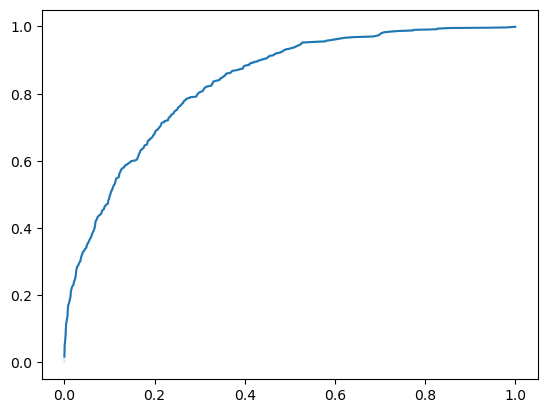

In [130]:
print("CatBoost: ")

accuracy_cb = accuracy_score(y_test, Y_preds_cb)
print("accuracy: ", accuracy_cb)

recall_cb = recall_score(y_test, Y_preds_cb, average='macro')
print("recall: ", recall_cb)

f1_score_cb = f1_score(y_test, Y_preds_cb, average='macro')1,
print("f1_score: ", f1_score_cb)

precision_cb = precision_score(y_test, Y_preds_cb, average='macro')
print("precision: ", precision_cb)

fpr, tpr, threshold = roc_curve(y_test, Y_scores_cb[:, 1])
roc_auc = auc(fpr, tpr)
sb.lineplot(x = fpr, y = tpr)

print("ROCAUC: ", roc_auc)

#CatBoost: 
#accuracy:  0.8007572172266919
#recall:  0.7156506468215329
#f1_score:  0.7270549358501335
#precision:  0.7438998009864152
#ROCAUC:  0.8337494783697316

In [151]:
metircs = ["accuracy", "recall", "f1_score", "preccission", "roc_auc"]
params = {
    'boosting_type' : ['gbdt', 'dart'],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    'num_iterations': [1, 5, 10], 
    'learning_rate': [0.05, 0.3, 0.1],
    'subsample': [1, 5, 10]
}

lgb_clf = LGBMClassifier()

lgb_clf_cv = GridSearchCV(estimator = lgb_clf, param_grid = params, cv = 3, verbose=True, n_jobs=-1)
lgb_clf_cv.fit(X_train, y_train.values.ravel())

Y_preds_lgb = lgb_clf_cv.predict(X_test)
Y_scores_lgb = lgb_clf_cv.predict_proba(X_test)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7979061qoc/croot/lightgbm_1714113233928/work/src/io/config_auto.cpp, line 365 .

[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7979061qoc/croot/lightgbm_1714113233928/work/src/io/config_auto.cpp, line 365 .

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params.

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7979061qoc/croot/lightgbm_1714113233928/work/src/io/config_auto.cpp, line 365 .

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7979061qoc/croot/lightgbm_1714113233928/work/src/io/config_auto.cpp, line 365 .

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params.

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7979061qoc/croot/lightgbm_1714113233928/work/src/io/config_auto.cpp, line 365 .

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfh

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /pri

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7979061qoc/croot/lightgbm_1714113233928/work/src/io/config_auto.cpp, line 365 .

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found 

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /pri

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7979061qoc/croot/lightgbm_1714113233928/work/src/io/config_auto.cpp, line 365 .

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7979061qoc/croot/lightgbm_1714113233928/work/src/io/config_auto.cpp, line 365 .

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params.

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7979061qoc/croot/lightgbm_1714113233928/work/src/io/config_auto.cpp, line 365 .

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7979061qoc/croot/lightgbm_1714113233928/work/src/io/config_auto.cpp, line 365 .

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params.

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7979061qoc/croot/lightgbm_1714113233928/work/src/io/config_auto.cpp, line 365 .

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfh

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7979061qoc/croot/lightgbm_1714113233928/work/src/io/config_auto.cpp, line 365 .

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found 

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7979061qoc/croot/lightgbm_1714113233928/work/src/io/config_auto.cpp, line 365 .

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found 

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7979061qoc/croot/lightgbm_1714113233928/work/src/io/config_auto.cpp, line 365 .

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found 

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7979061qoc/croot/lightgbm_1714113233928/work/src/io/config_auto.cpp, line 365 .

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7979061qoc/croot/lightgbm_1714113233928/work/src/io/config_auto.cpp, line 365 .

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params.

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7979061qoc/croot/lightgbm_1714113233928/work/src/io/config_auto.cpp, line 365 .

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7979061qoc/croot/lightgbm_1714113233928/work/src/io/config_auto.cpp, line 365 .

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params.

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7979061qoc/croot/lightgbm_1714113233928/work/src/io/config_auto.cpp, line 365 .

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found 

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7979061qoc/croot/lightgbm_1714113233928/work/src/io/config_auto.cpp, line 365 .

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found 

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7979061qoc/croot/lightgbm_1714113233928/work/src/io/config_auto.cpp, line 365 .

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found 

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7979061qoc/croot/lightgbm_1714113233928/work/src/io/config_auto.cpp, line 365 .

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7979061qoc/croot/lightgbm_1714113233928/work/src/io/config_auto.cpp, line 365 .

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params.

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7979061qoc/croot/lightgbm_1714113233928/work/src/io/config_auto.cpp, line 365 .

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found 

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7979061qoc/croot/lightgbm_1714113233928/work/src/io/config_auto.cpp, line 365 .

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7979061qoc/croot/lightgbm_1714113233928/work/src/io/config_auto.cpp, line 365 .

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params.

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7979061qoc/croot/lightgbm_1714113233928/work/src/io/config_auto.cpp, line 365 .

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found 

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7979061qoc/croot/lightgbm_1714113233928/work/src/io/config_auto.cpp, line 365 .

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7979061qoc/croot/lightgbm_1714113233928/work/src/io/config_auto.cpp, line 365 .

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params.

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7979061qoc/croot/lightgbm_1714113233928/work/src/io/config_auto.cpp, line 365 .

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found 

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7979061qoc/croot/lightgbm_1714113233928/work/src/io/config_auto.cpp, line 365 .

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfh

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7979061qoc/croot/lightgbm_1714113233928/work/src/io/config_auto.cpp, line 365 .

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfh

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7979061qoc/croot/lightgbm_1714113233928/work/src/io/config_auto.cpp, line 365 .

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found 

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7979061qoc/croot/lightgbm_1714113233928/work/src/io/config_auto.cpp, line 365 .

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfh

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7979061qoc/croot/lightgbm_1714113233928/work/src/io/config_auto.cpp, line 365 .

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7979061qoc/croot/lightgbm_1714113233928/work/src/io/config_auto.cpp, line 365 .

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params.

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7979061qoc/croot/lightgbm_1714113233928/work/src/io/config_auto.cpp, line 365 .

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7979061qoc/croot/lightgbm_1714113233928/work/src/io/config_auto.cpp, line 365 .

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params.

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7979061qoc/croot/lightgbm_1714113233928/work/src/io/config_auto.cpp, line 365 .

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found 

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7979061qoc/croot/lightgbm_1714113233928/work/src/io/config_auto.cpp, line 365 .

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found 

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7979061qoc/croot/lightgbm_1714113233928/work/src/io/config_auto.cpp, line 365 .

/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found 

/Users/arsen/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
648 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
648 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/arsen/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/sklearn.py", line 1187, in fit
    super().fit(
  File "/Users/arsen/anaconda3/lib/python3.11/site-packages/lightgbm/sklearn.py", line 885, in fit
    self._Booster = train(
                    ^^^^^^
  File "/Users/arse

[LightGBM] [Info] Number of positive: 1316, number of negative: 3614
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 548
[LightGBM] [Info] Number of data points in the train set: 4930, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266937 -> initscore=-1.010218
[LightGBM] [Info] Start training from score -1.010218


Lightgbm: 
accuracy:  0.7893989588263133
recall:  0.6957017665878426
f1_score:  (0.707923709188886,)
precision:  0.7278269881625183
ROCAUC:  0.8347782491769835


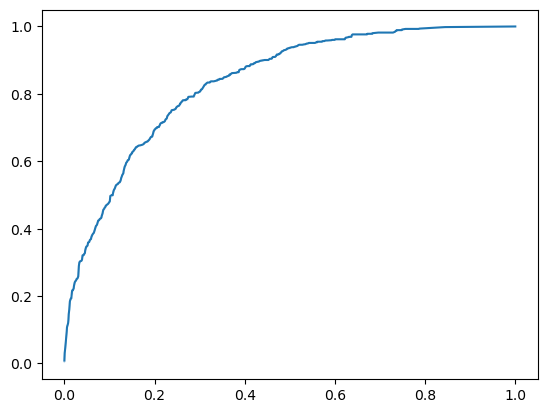

[LightGBM] [Info] Number of positive: 877, number of negative: 2410
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 548
[LightGBM] [Info] Number of data points in the train set: 3287, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266809 -> initscore=-1.010875
[LightGBM] [Info] Start training from score -1.010875
[LightGBM] [Info] Number of positive: 877, number of negative: 2409
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007105 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 548
[LightGBM] [Info] Number of data points in the train set: 3286, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266890 -> initscore=-1.010460
[LightGBM] [

[LightGBM] [Info] Number of positive: 878, number of negative: 2409
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001844 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 548
[LightGBM] [Info] Number of data points in the train set: 3287, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267113 -> initscore=-1.009320
[LightGBM] [Info] Start training from score -1.009320
[LightGBM] [Info] Number of positive: 877, number of negative: 2410
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 548
[LightGBM] [Info] Number of data points in the train set: 3287, number of used features: 16
[LightGBM] [Info] [binary:Bo

[LightGBM] [Info] Number of positive: 877, number of negative: 2409
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003659 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 548
[LightGBM] [Info] Number of data points in the train set: 3286, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266890 -> initscore=-1.010460
[LightGBM] [Info] Start training from score -1.010460
[LightGBM] [Info] Number of positive: 877, number of negative: 2409
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 548
[LightGBM] [Info] Number of data points in the train set: 3286, number of used features: 16
[LightGBM] [Info] [binary:Bo

[LightGBM] [Info] Number of positive: 877, number of negative: 2410
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016724 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 548
[LightGBM] [Info] Number of data points in the train set: 3287, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266809 -> initscore=-1.010875
[LightGBM] [Info] Start training from score -1.010875
[LightGBM] [Info] Number of positive: 878, number of negative: 2409
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 548
[LightGBM] [Info] Number of data points in the train set: 3287, number of used features: 16
[LightGBM] [Info] [binary:Bo

[LightGBM] [Info] Number of data points in the train set: 3286, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266890 -> initscore=-1.010460
[LightGBM] [Info] Start training from score -1.010460
[LightGBM] [Info] Number of positive: 878, number of negative: 2409
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021104 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 548
[LightGBM] [Info] Number of data points in the train set: 3287, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267113 -> initscore=-1.009320
[LightGBM] [Info] Start training from score -1.009320
[LightGBM] [Info] Number of positive: 877, number of negative: 2409
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wis

[LightGBM] [Info] Number of positive: 877, number of negative: 2409
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 548
[LightGBM] [Info] Number of data points in the train set: 3286, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266890 -> initscore=-1.010460
[LightGBM] [Info] Start training from score -1.010460
[LightGBM] [Info] Number of positive: 878, number of negative: 2409
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014865 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 548
[LightGBM] [Info] Number of data points in the train set: 3287, number of used features: 16
[LightGBM] [Info] [binary:Bo

[LightGBM] [Info] Number of positive: 877, number of negative: 2410
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020965 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 548
[LightGBM] [Info] Number of data points in the train set: 3287, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266809 -> initscore=-1.010875
[LightGBM] [Info] Start training from score -1.010875
[LightGBM] [Info] Number of positive: 878, number of negative: 2409
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 548
[LightGBM] [Info] Number of data points in the train set: 3287, number of used features: 16
[LightGBM] [Info] [binary:Bo

In [153]:
Y_preds_lgb = lgb_clf_cv.predict(X_test)
Y_scores_lgb = lgb_clf_cv.predict_proba(X_test)

print("Lightgbm: ")

accuracy_cb = accuracy_score(y_test, Y_preds_lgb)
print("accuracy: ", accuracy_cb)

recall_cb = recall_score(y_test, Y_preds_lgb, average='macro')
print("recall: ", recall_cb)

f1_score_cb = f1_score(y_test, Y_preds_lgb, average='macro'),
print("f1_score: ", f1_score_cb)

precision_cb = precision_score(y_test, Y_preds_lgb, average='macro')
print("precision: ", precision_cb)

fpr, tpr, threshold = roc_curve(y_test, Y_scores_lgb[:, 1])
roc_auc = auc(fpr, tpr)
sb.lineplot(x = fpr, y = tpr)

print("ROCAUC: ", roc_auc)

# Lightgbm: 
# accuracy:  0.795551348793185
# recall:  0.7050638707284277
# f1_score:  0.7245110821382008
# precision:  0.7355467240504028
# ROCAUC:  0.8300621319608661

Выводы:
1. Изначально XGBoost незначительно уступает СatBoost и Lightgbm. Форма ROC-кривых схожа во всех 3-х случаях
2. Проведенная кросс-валидация повысила метрики XGBoost на ~2%, в то время как для СatBoost и Lightgbm наоборот метрики упали.
3. Главный вывод: из коробки XGBoost работает хуже, чем СatBoost и Lightgbm, однако лучше поддается под